In [ ]:
import tensorflow as tf
if tf.__version__ != 2.0:
  !pip install --upgrade tensorflow==2.0
print(tf.__version__)

**MNIST Hand writing digit**

Loading the mnist dataset in Keras

In [0]:
from tensorflow.keras.datasets import mnist

In [3]:
# Download the data from the internet
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# All images in the dataset are of 28x28 pixels
# train_images = these are the images for training these are already vectorized
# the values of the pixel ranges from (0 - 255) 
train_images.shape 

(60000, 28, 28)

In [5]:
train_images[0].ndim

2

In [6]:
train_images[0].shape

(28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels[0]

5

The Network Architec[link text](https://)ture

**The Network Architecture**


There are two main things in Deep Learning:
- Models
- Layers

The data passes through the layers and the model gets trained.
The learning is based on weights(w, b)

In [0]:
# importing models and layers
from tensorflow.keras import models, layers

There are two types of models in TF deep learning:
- Sequential (Layers are in sequence)
- Functional API 

In [0]:
network = models.Sequential() 
# right now we will use sequential model

- Layers.Dense ==> making layers in model / adding layers to model
- Dense means fully connected
- Fully connected means all nodes of a layer are connected with nodes of previous layer

In [0]:
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# 512 is the number of output that will come from this layer
# input_shape = (28 * 28,1)
network.add(layers.Dense(10, activation='softmax'))

##### **Compilation Step :**

In [0]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### **Preparing the image data :**

In [0]:
train_images = train_images.reshape([60000, 28 * 28]) # decreasig the dimension of data for (row x columns) into rows only
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape([10000, 28 * 28])
test_images = test_images.astype('float32') / 255 

#### **Preparing the Labels:**

In [0]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.2200 - acc: 0.9320
Epoch 2/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0811 - acc: 0.9750
Epoch 3/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0537 - acc: 0.9833
Epoch 4/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0391 - acc: 0.9880
Epoch 5/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0293 - acc: 0.9908


In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('testing accuracy :', test_acc*100)

10000/10000 [==============================] - 1s 98us/sample - loss: 0.1042 - acc: 0.9759
testing accuracy : 97.58999943733215


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


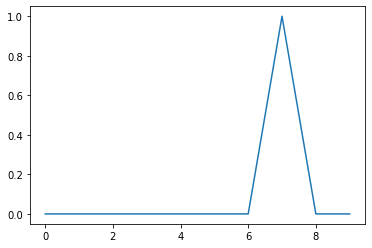

In [22]:
import matplotlib.pyplot as plt
plt.plot(network.predict(test_images)[0])
print(test_labels[0]) # equals to 7
plt.show()

#### **Visualizing the data**

In [0]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

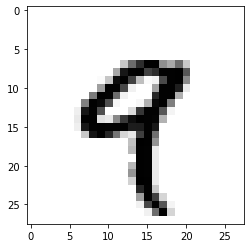

In [32]:
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [33]:
train_labels[4]

9